In [ ]:
# Research Question
#  Is there an association between average household income and service requests? 
# What is the relationship between average household income and non-parking related service requests? 
# What is the relationship between average household income and parking related service requests?

In [227]:
import pandas as pd
import matplotlib.pyplot as plt

In [228]:
excel_file = '2011-2015 Ward.xls'
sheetname='2011-15 Economic_Ward'
all_files=pd.ExcelFile(excel_file)
Economic=pd.read_excel(all_files,sheetname, header=[2,3], index_col=0)
Mean_income=Economic.iloc[[77]]
Mean_income.columns.set_levels(['Ward_1','Ward_2','Ward_3', 'Ward_4', 'Ward_5', 'Ward_6', 'Ward_7', 'Ward_8'],level=0,inplace=True)
Mean_income

Subject                                 Ward_1                          \
                                      Estimate Margin of Error Percent   
EMPLOYMENT STATUS                                                        
      Mean household income (dollars)   106388        +/-3,222     (X)   

Subject                                                         Ward_2  \
                                      Percent Margin of Error Estimate   
EMPLOYMENT STATUS                                                        
      Mean household income (dollars)                     (X)   140459   

Subject                                                        \
                                      Margin of Error Percent   
EMPLOYMENT STATUS                                               
      Mean household income (dollars)        +/-4,977     (X)   

Subject                                                         Ward_3  \
                                      Percent Margin of Error Estimate   
EMPLOYMENT STATUS                                                        
      Mean household income (dollars)                     (X)   176921   

Subject                                                ...  Ward_6  \
                                      Margin of Error  ... Percent   
EMPLOYMENT STATUS                                      ...           
      Mean household income (dollars)        +/-6,627  ...     (X)   

Subject                                                         Ward_7  \
                                      Percent Margin of Error Estimate   
EMPLOYMENT STATUS                                                        
      Mean household income (dollars)                     (X)    53093   

Subject                                                        \
                                      Margin of Error Percent   
EMPLOYMENT STATUS                                               
      Mean household income (dollars)        +/-2,360     (X)   

Subject                                                         Ward_8  \
                                      Percent Margin of Error Estimate   
EMPLOYMENT STATUS                                                        
      Mean household income (dollars)                     (X)    44245   

Subject                                                        \
                                      Margin of Error Percent   
EMPLOYMENT STATUS                                               
      Mean household income (dollars)        +/-2,230     (X)   

Subject                                                        
                                      Percent Margin of Error  
EMPLOYMENT STATUS                                              
      Mean household income (dollars)                     (X)  

[1 rows x 32 columns]

In [229]:
service_requests=pd.read_csv('City_Service_Requests_in_2014.csv', low_memory=False)
service_requests.WARD=service_requests.WARD.replace({"1":"Ward 1","2":"Ward 2","3":"Ward 3","4":"Ward 4",
"5":"Ward 5","6":"Ward 6","7":"Ward 7","8":"Ward 8"})
num_service_requests=service_requests.groupby('WARD')['OBJECTID'].count().reset_index()
num_service_requests.columns=['Ward','total_num_of_requests']
num_service_requests

,Ward,total_num_of_requests
0,Ward 1,29378
1,Ward 2,82924
2,Ward 3,30929
3,Ward 4,39432
4,Ward 5,36207
5,Ward 6,60159
6,Ward 7,26437
7,Ward 8,16999


In [230]:
service_requests_parking=service_requests[service_requests['SERVICECODEDESCRIPTION'].str.contains("Parking")]
service_requests_parking_bw=service_requests_parking.groupby('WARD')['OBJECTID'].count().reset_index()
service_requests_parking_bw.columns=['Ward','num_parking_requests']
service_requests_parking_bw

,Ward,num_parking_requests
0,Ward 1,10850
1,Ward 2,66073
2,Ward 3,9184
3,Ward 4,5212
4,Ward 5,6082
5,Ward 6,30342
6,Ward 7,2346
7,Ward 8,1955


In [231]:
service_requests_no_parking=service_requests[~service_requests['SERVICECODEDESCRIPTION'].str.contains("Parking")]
service_requests_no_parking_bw=service_requests_no_parking.groupby('WARD')['OBJECTID'].count().reset_index()
service_requests_no_parking_bw.columns=['Ward','num_non_parking_requests']
service_requests_no_parking_bw

,Ward,num_non_parking_requests
0,Ward 1,18528
1,Ward 2,16851
2,Ward 3,21745
3,Ward 4,34220
4,Ward 5,30125
5,Ward 6,29817
6,Ward 7,24091
7,Ward 8,15044


In [232]:
income=Mean_income.iloc[:, Mean_income.columns.get_level_values(1)=='Estimate']
income.head()

Subject,Ward_1,Ward_2,Ward_3,Ward_4,Ward_5,Ward_6,Ward_7,Ward_8
,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate
EMPLOYMENT STATUS,,,,,,,,
Mean household income (dollars),106388,140459,176921,111933,77329,117002,53093,44245


In [233]:
income_transposed=income.T
income_transposed=income_transposed.reset_index()
income_transposed.rename(columns={'Subject':'Ward','Mean household income (dollars)':'mean_household_income'},inplace=True)
income_transposed=income_transposed.drop(columns=['level_1'])
income_transposed.columns=['Ward','mean_household_income']
income_transposed.Ward=income_transposed.Ward.replace({'Ward_1':'Ward 1','Ward_2':'Ward 2','Ward_3':'Ward 3','Ward_4':'Ward 4',
'Ward_5':'Ward 5','Ward_6':'Ward 6','Ward_7':'Ward 7','Ward_8':'Ward 8'})
income_transposed

,Ward,mean_household_income
0,Ward 1,106388
1,Ward 2,140459
2,Ward 3,176921
3,Ward 4,111933
4,Ward 5,77329
5,Ward 6,117002
6,Ward 7,53093
7,Ward 8,44245


In [234]:
total_requests_by_income=num_service_requests.merge(income_transposed, on='Ward')
total_requests_by_income

,Ward,total_num_of_requests,mean_household_income
0,Ward 1,29378,106388
1,Ward 2,82924,140459
2,Ward 3,30929,176921
3,Ward 4,39432,111933
4,Ward 5,36207,77329
5,Ward 6,60159,117002
6,Ward 7,26437,53093
7,Ward 8,16999,44245


In [235]:
parking_requests_by_income=service_requests_parking_bw.merge(income_transposed,on='Ward')
parking_requests_by_income

,Ward,num_parking_requests,mean_household_income
0,Ward 1,10850,106388
1,Ward 2,66073,140459
2,Ward 3,9184,176921
3,Ward 4,5212,111933
4,Ward 5,6082,77329
5,Ward 6,30342,117002
6,Ward 7,2346,53093
7,Ward 8,1955,44245


In [236]:
non_parking_requests_by_income=service_requests_no_parking_bw.merge(income_transposed,on='Ward')
non_parking_requests_by_income

,Ward,num_non_parking_requests,mean_household_income
0,Ward 1,18528,106388
1,Ward 2,16851,140459
2,Ward 3,21745,176921
3,Ward 4,34220,111933
4,Ward 5,30125,77329
5,Ward 6,29817,117002
6,Ward 7,24091,53093
7,Ward 8,15044,44245


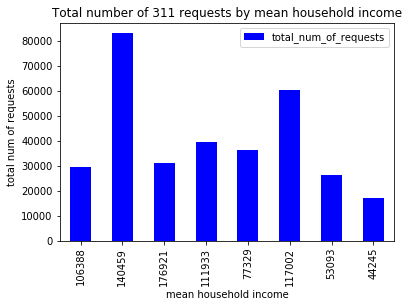

In [237]:
total_requests_by_income.plot(kind='bar',x='mean_household_income',y='total_num_of_requests', color='blue')
plt.xlabel('mean household income')
plt.ylabel('total num of requests')
plt.title('Total number of 311 requests by mean household income')
plt.show()

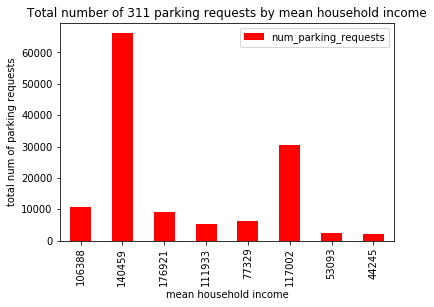

In [238]:
parking_requests_by_income.plot(kind='bar',x='mean_household_income',y='num_parking_requests',color='red')
plt.xlabel('mean household income')
plt.ylabel('total num of parking requests')
plt.title('Total number of 311 parking requests by mean household income')
plt.show()

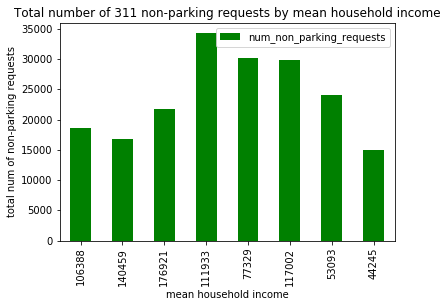

In [239]:
non_parking_requests_by_income.plot(kind='bar',x='mean_household_income',y='num_non_parking_requests',color='green')
plt.xlabel('mean household income')
plt.ylabel('total num of non-parking requests')
plt.title('Total number of 311 non-parking requests by mean household income')
plt.show()

In [ ]:
# Conclusions
# It appears that generally, the higher the mean income in a ward, the greater number of service requests. Ward 2 had the most overall service
# requests while Ward 8 had the fewest. Ward 2 had the majority of its requests linked to parking issues while Ward 8
# had the majority of requests related to non-parking issues. 
# Ward 2 is where all of the monuments and museumms are located so it would make sense for there to be 
# a large amount of parking calls related to that Ward. In Ward 8, the lack of parking calls likely stems from the fact
# many residents cannot afford the cost of owning a car.This is why the majority of their complaints are about
# non-parking related issues.

In [ ]:
# Implications
# The richer areas of the city (especially Ward 2, Ward 3 and to an extent Ward 6) seem to have residents who have
# enough time on their hands to complain about no emergency situations such as parking illegally or littering. In Ward 7
# and Ward 8, people do not have the time (since they probably work multiple jobs) to worry about seemingly trivial 
# violations of the law and so do not care to phone the non-emergency number to report a violation.

In [ ]:
# Limitations
# The demographic make up may expaain why Ward 7 and 8 residents do not call the police for non-emergency situations.
# Wards 7 and 8 are majority African American and the residents may feel the police are biased against them because
# 1) they are African American and 2) because they are considered lower income.This tense relationship with the police
# may actually be a confounding variable that a simple income vs. requests graph will not be able to explain.